Read in the data

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

connection = sqlite3.connect('../final-project/FPA_FOD_20170508.sqlite')
fires_df = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE FROM 'Fires'", connection)


In [3]:
fires_df['DATE'] = pd.to_datetime(fires_df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
print(fires_df.head()) #check the data

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   FIRE_SIZE       DATE  
0       0.10 2005-02-02  
1       0.25 2004-05-12  
2       0.10 2004-05-31  
3       0.10 2004-06-28  
4       0.10 2004-06-28  


In [4]:
print(fires_df.shape)

(1880465, 8)


Use value counts and describe to get a preliminary understanding of the data

In [5]:
fires_df['STAT_CAUSE_DESCR'].value_counts()

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

In [6]:
fires_df["FIRE_YEAR"].value_counts()

2006    114004
2000     96416
2007     95573
2011     90552
1999     89363
2005     88604
2001     86587
2008     85378
2010     79889
2009     78325
1994     75955
2002     75656
1996     75574
2015     74491
2012     72769
1995     71472
2004     69279
1998     68370
2003     68261
1992     67975
2014     67753
2013     64780
1993     61989
1997     61450
Name: FIRE_YEAR, dtype: int64

In [7]:
fires_df["LATITUDE"].describe()

count    1.880465e+06
mean     3.678121e+01
std      6.139031e+00
min      1.793972e+01
25%      3.281860e+01
50%      3.545250e+01
75%      4.082720e+01
max      7.033060e+01
Name: LATITUDE, dtype: float64

In [8]:
fires_df["LONGITUDE"].describe()

count    1.880465e+06
mean    -9.570494e+01
std      1.671694e+01
min     -1.788026e+02
25%     -1.103635e+02
50%     -9.204304e+01
75%     -8.229760e+01
max     -6.525694e+01
Name: LONGITUDE, dtype: float64

In [9]:
fires_df["STATE"].value_counts()

CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
OR     61088
MN     44769
OK     43239
MT     40767
NM     37478
ID     36698
CO     34157
WA     33513
WI     31861
AR     31663
TN     31154
SD     30963
UT     30725
LA     30013
KY     27089
NJ     25949
PR     22081
WV     21967
VA     21833
MO     17953
NV     16956
ND     15201
WY     14166
ME     13150
AK     12843
MI     10502
HI      9895
PA      8712
NE      7973
KS      7673
CT      4976
IA      4134
MD      3622
OH      3479
MA      2626
NH      2452
IL      2327
IN      2098
RI       480
VT       456
DE       171
DC        66
Name: STATE, dtype: int64

In [10]:
fires_df["FIRE_SIZE"].describe()

count    1.880465e+06
mean     7.452016e+01
std      2.497598e+03
min      1.000000e-05
25%      1.000000e-01
50%      1.000000e+00
75%      3.300000e+00
max      6.069450e+05
Name: FIRE_SIZE, dtype: float64

In [11]:
fires_df["DATE"].describe()

/Users/BrettCotler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                 1880465
unique                   8766
top       2008-02-10 00:00:00
freq                     1208
first     1992-01-01 00:00:00
last      2015-12-31 00:00:00
Name: DATE, dtype: object

In [12]:
fires_df["DAY"] = pd.DatetimeIndex(fires_df["DATE"]).day
fires_df["MONTH"] = pd.DatetimeIndex(fires_df["DATE"]).month

In [14]:
print(fires_df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   FIRE_SIZE       DATE  DAY  MONTH  
0       0.10 2005-02-02    2      2  
1       0.25 2004-05-12   12      5  
2       0.10 2004-05-31   31      5  
3       0.10 2004-06-28   28      6  
4       0.10 2004-06-28   28      6  


Create some basic EDA visualizations

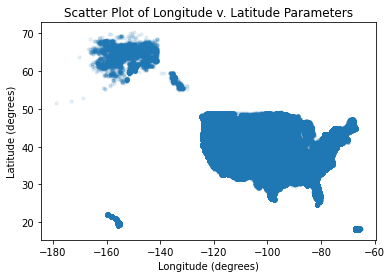

In [18]:
fires_df.plot.scatter("LONGITUDE", "LATITUDE", s = 10, alpha = 0.1)
plt.xlabel("Longitude (degrees)")
plt.ylabel("Latitude (degrees)")
plt.title("Scatter Plot of Longitude v. Latitude Parameters")
plt.show()

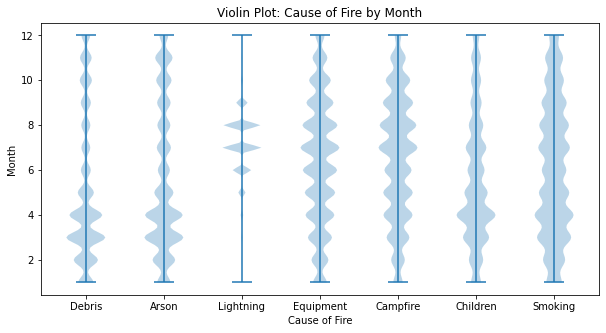

In [25]:
dataset = [fires_df[fires_df['STAT_CAUSE_DESCR'] == 'Debris Burning']["MONTH"].values,
          fires_df[fires_df['STAT_CAUSE_DESCR'] == 'Arson']["MONTH"].values,
          fires_df[fires_df['STAT_CAUSE_DESCR'] == 'Lightning']["MONTH"].values,
          fires_df[fires_df['STAT_CAUSE_DESCR'] == 'Equipment Use']["MONTH"].values,
          fires_df[fires_df['STAT_CAUSE_DESCR'] == 'Campfire']["MONTH"].values,
          fires_df[fires_df['STAT_CAUSE_DESCR'] == 'Children']["MONTH"].values,
          fires_df[fires_df['STAT_CAUSE_DESCR'] == 'Smoking']["MONTH"].values]
plt.figure(figsize=(10,5))
plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5,6,7], ['Debris', 'Arson', 'Lightning', 'Equipment', 'Campfire','Children', 'Smoking'])
plt.title("Violin Plot: Cause of Fire by Month")
plt.ylabel('Month')
plt.xlabel('Cause of Fire')
plt.show()

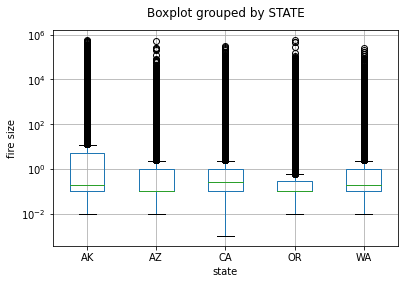

In [28]:
fires_df[(fires_df["STATE"] == "CA")|(fires_df["STATE"] == "WA")|(fires_df["STATE"] == "OR")|
                              (fires_df["STATE"] == "AK")|(fires_df["STATE"] == "AZ")][["FIRE_SIZE","STATE"]].boxplot(by = "STATE")
plt.ylabel("fire size")
plt.xlabel('state')
plt.yscale("log")
plt.title('')
plt.show()


Split the data

In [35]:
from sklearn.model_selection import train_test_split

X_inter1 = fires_df.loc[:, fires_df.columns != 'STAT_CAUSE_DESCR']
X_inter2 = X_inter1.loc[:, X_inter1.columns != 'DISCOVERY_DATE']
X = X_inter2.loc[:, X_inter2.columns != 'DATE']
y = fires_df['STAT_CAUSE_DESCR']



In [36]:
random_state = 12

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size = 0.98, random_state = random_state)
print("training set:", X_train.shape, y_train.shape)
print(X_other.shape, y_other.shape)

X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, train_size = 0.5, random_state = random_state)
print("validation set:", X_val.shape, y_val.shape)
print("test set:", X_test.shape, y_test.shape)


training set: (1842855, 7) (1842855,)
(37610, 7) (37610,)
validation set: (18805, 7) (18805,)
test set: (18805, 7) (18805,)


Preprocess the data

In [44]:
import sklearn.preprocessing
from sklearn.preprocessing import OrdinalEncoder

cats = [[1,2,3,4,5,6,7,8,9,10,11,12]]


enc = OrdinalEncoder(categories = cats)

ordinal_ftr = ["MONTH"]

enc.fit(X_train[ordinal_ftr])
ordinal_train = enc.transform(X_train[ordinal_ftr])
print('transformed train features:')
print(ordinal_train)
# transform X_val
ordinal_val = enc.transform(X_val[ordinal_ftr])
print('transformed validation features:')
print(ordinal_val)
# transform X_test
ordinal_test = enc.transform(X_test[ordinal_ftr])
print('transformed test features:')
print(ordinal_test)




transformed train features:
[[7.]
 [1.]
 [2.]
 ...
 [4.]
 [4.]
 [2.]]
transformed validation features:
[[ 6.]
 [11.]
 [ 3.]
 ...
 [ 7.]
 [ 2.]
 [ 4.]]
transformed test features:
[[2.]
 [3.]
 [9.]
 ...
 [3.]
 [7.]
 [6.]]


In [47]:
from sklearn.preprocessing import OneHotEncoder
onehot_ftr = ["STATE"]
enc = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
enc.fit(X_train[onehot_ftr])

print('feature names:', enc.get_feature_names(onehot_ftr))

feature names: ['STATE_AK' 'STATE_AL' 'STATE_AR' 'STATE_AZ' 'STATE_CA' 'STATE_CO'
 'STATE_CT' 'STATE_DC' 'STATE_DE' 'STATE_FL' 'STATE_GA' 'STATE_HI'
 'STATE_IA' 'STATE_ID' 'STATE_IL' 'STATE_IN' 'STATE_KS' 'STATE_KY'
 'STATE_LA' 'STATE_MA' 'STATE_MD' 'STATE_ME' 'STATE_MI' 'STATE_MN'
 'STATE_MO' 'STATE_MS' 'STATE_MT' 'STATE_NC' 'STATE_ND' 'STATE_NE'
 'STATE_NH' 'STATE_NJ' 'STATE_NM' 'STATE_NV' 'STATE_NY' 'STATE_OH'
 'STATE_OK' 'STATE_OR' 'STATE_PA' 'STATE_PR' 'STATE_RI' 'STATE_SC'
 'STATE_SD' 'STATE_TN' 'STATE_TX' 'STATE_UT' 'STATE_VA' 'STATE_VT'
 'STATE_WA' 'STATE_WI' 'STATE_WV' 'STATE_WY']


In [50]:
# transform X_train
onehot_train = enc.transform(X_train[onehot_ftr])
print('transformed train features:')
print(onehot_train)
# transform X_val
onehot_val = enc.transform(X_val[onehot_ftr])
print('transformed val features:')
print(onehot_val)
# transform X_test
onehot_test = enc.transform(X_test[onehot_ftr])
print('transformed test features:')
print(onehot_test)

transformed train features:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
transformed val features:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
transformed test features:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [51]:
from sklearn.preprocessing import MinMaxScaler

minmax_ftrs = ['FIRE_YEAR', 'DAY']

scaler = MinMaxScaler()
scaler.fit(X_train[minmax_ftrs])
print(scaler.transform(X_train[minmax_ftrs]))
print(scaler.transform(X_val[minmax_ftrs])) 
print(scaler.transform(X_test[minmax_ftrs])) 

In [55]:
from sklearn.preprocessing import StandardScaler

std_ftrs = ['LONGITUDE', 'LATITUDE','FIRE_SIZE']
scaler = StandardScaler()
print(scaler.fit_transform(X_train[std_ftrs]))
print(scaler.transform(X_val[std_ftrs]))
print(scaler.transform(X_test[std_ftrs]))